# **Lab 1**
#### Name: Vivek Sapkal
#### Roll No.: B22AI066

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

### **Story 1: Exploring the Trends: Visualizing Titanic Passenger Data**

##### **Task 1**

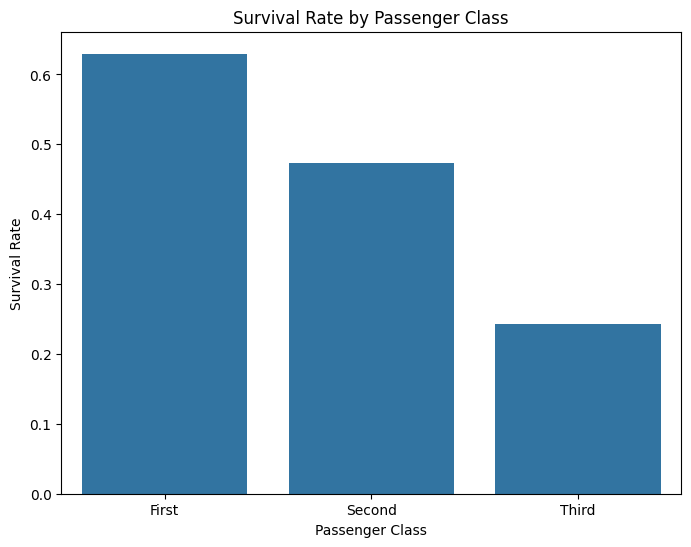

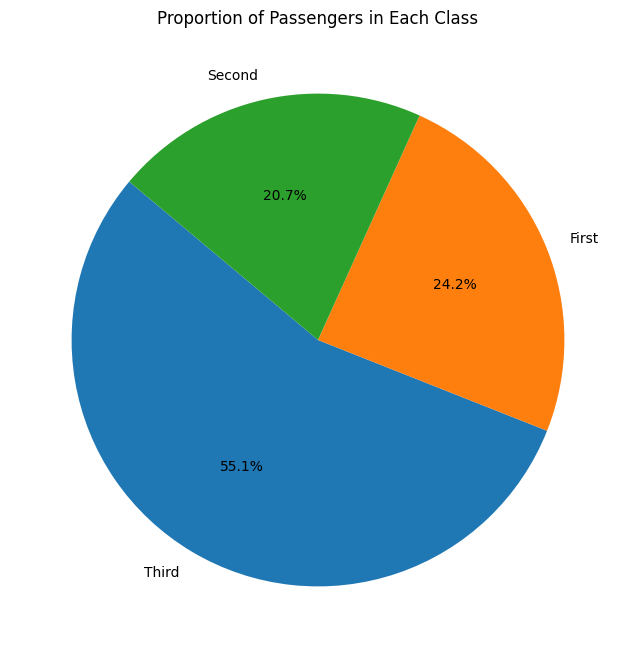

In [4]:
titanic = sns.load_dataset('titanic')

plt.figure(figsize=(8, 6))
sns.barplot(x='class', y='survived', data=titanic, errorbar=None)
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class')
plt.savefig('figs/fig1-1.png', dpi=300)
plt.show()

class_counts = titanic['class'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Passengers in Each Class')
plt.savefig('figs/fig1-2.png', dpi=300)
plt.show()

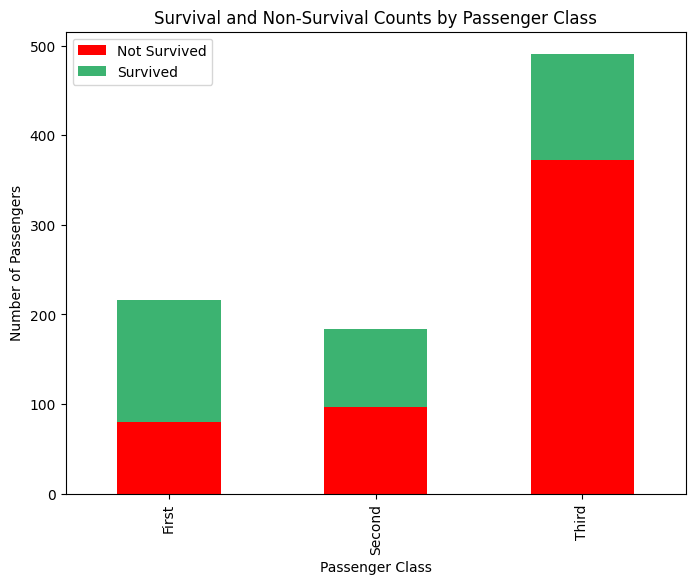

In [5]:
survival_counts = titanic.groupby(['class', 'survived'], observed=False).size().unstack()
survival_counts.plot(kind='bar', stacked=True, figsize=(8, 6), color=['red', 'mediumseagreen'])
plt.title('Survival and Non-Survival Counts by Passenger Class')
plt.ylabel('Number of Passengers')
plt.xlabel('Passenger Class')
plt.legend(['Not Survived', 'Survived'])
plt.savefig('figs/fig2.png', dpi=300)
plt.show()

**Stacked Bar Chart:** This additional visualization shows both the survival and non-survival counts within each passenger class. It provides a clear comparison of survival rates within each class, making it easy to see the distribution of survival and non-survival across different classes.

##### **Task 2**

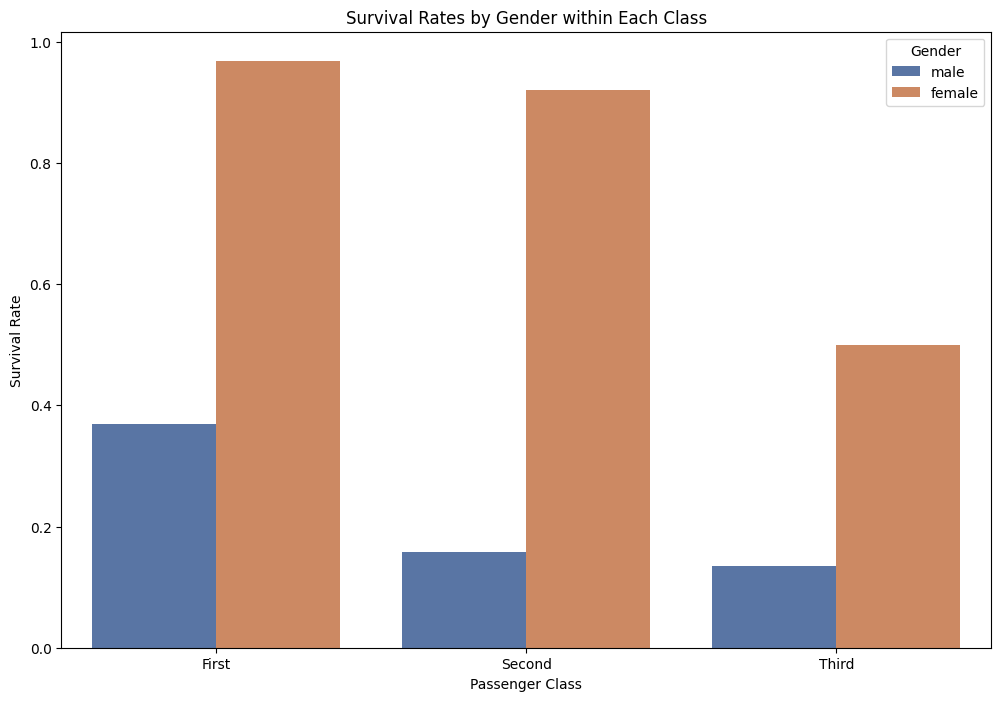

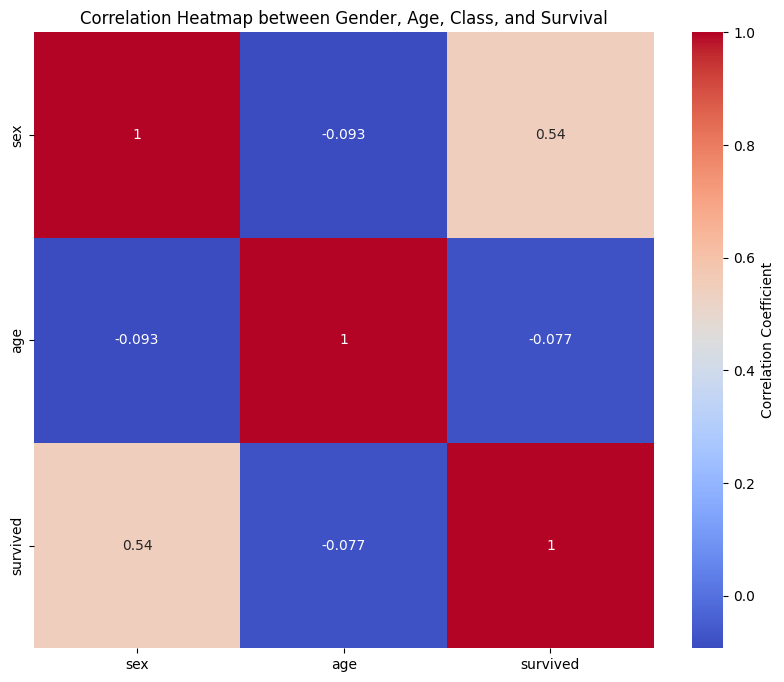

In [6]:
plt.figure(figsize=(12, 8))
sns.barplot(x='class', y='survived', hue='sex', data=titanic, errorbar=None, palette='deep')
plt.title('Survival Rates by Gender within Each Class')
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class')
plt.legend(title='Gender')
plt.savefig('figs/fig3-1.png', dpi=300)
plt.show()

titanic_corr = titanic.copy()
titanic_corr['sex'] = titanic_corr['sex'].map({'male': 0, 'female': 1})
corr_matrix = titanic_corr[['sex', 'age', 'survived']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Heatmap between Gender, Age, Class, and Survival')
plt.savefig('figs/fig3-2.png', dpi=300)
plt.show()

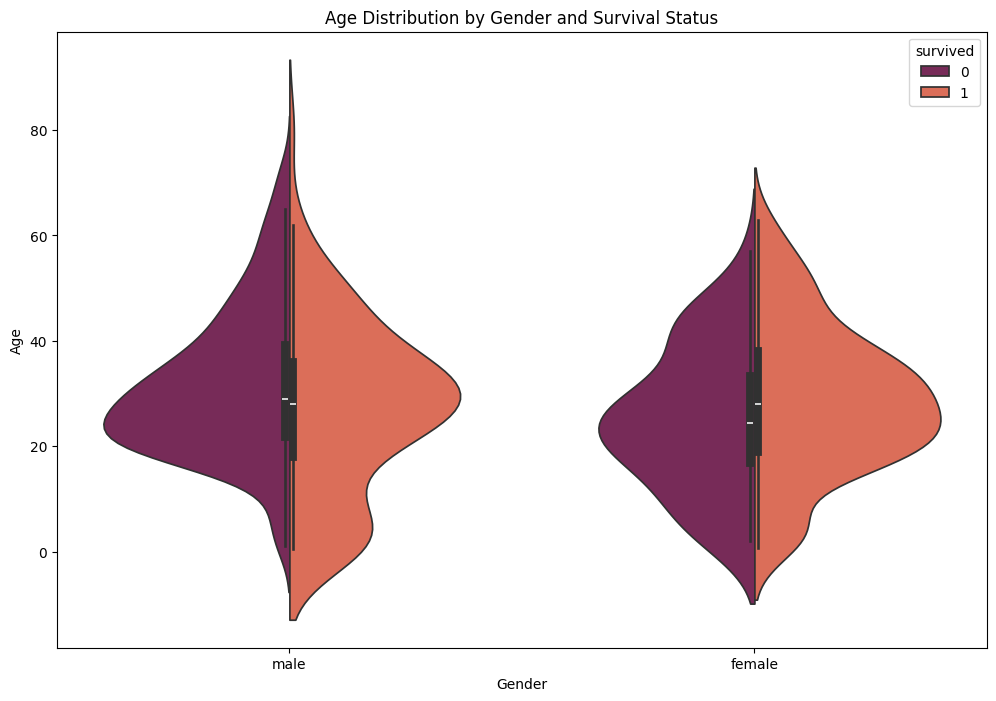

In [7]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='sex', y='age', hue='survived', data=titanic, split=True, palette='rocket')
plt.title('Age Distribution by Gender and Survival Status')
plt.ylabel('Age')
plt.xlabel('Gender')
plt.savefig('figs/fig4.png', dpi=300)
plt.show()

**Violin Plot:** This additional visualization shows the distribution of age across different genders and survival status, providing deeper insights into the data.

##### **Task 3**

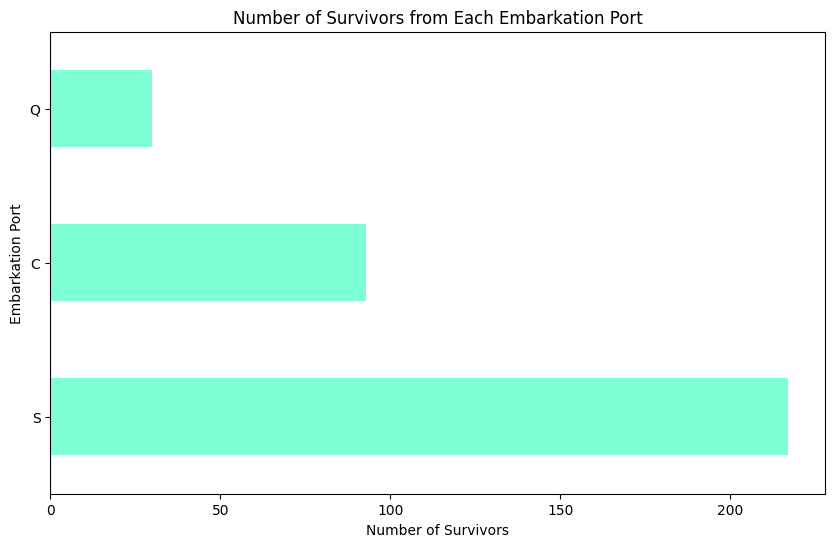

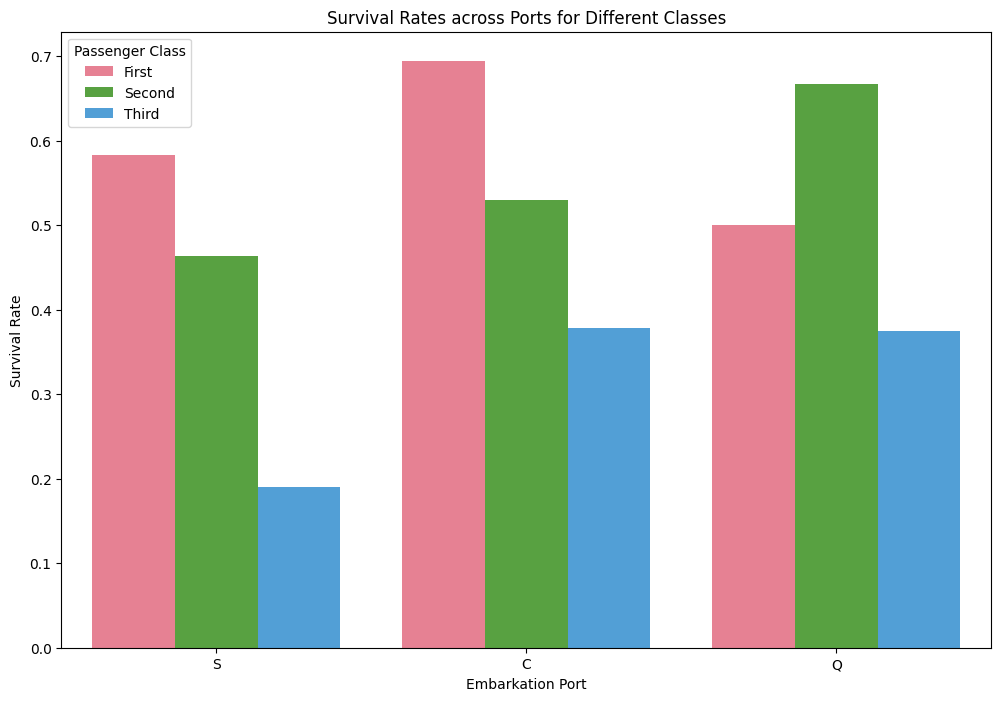

In [8]:
survivors_by_port = titanic[titanic['survived'] == 1]['embarked'].value_counts()
plt.figure(figsize=(10, 6))
survivors_by_port.plot(kind='barh', color='aquamarine')
plt.title('Number of Survivors from Each Embarkation Port')
plt.xlabel('Number of Survivors')
plt.ylabel('Embarkation Port')
plt.savefig('figs/fig5-1.png', dpi=300)
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x='embarked', y='survived', hue='class', data=titanic, errorbar=None, palette='husl')
plt.title('Survival Rates across Ports for Different Classes')
plt.ylabel('Survival Rate')
plt.xlabel('Embarkation Port')
plt.legend(title='Passenger Class')
plt.savefig('figs/fig5-2.png', dpi=300)
plt.show()

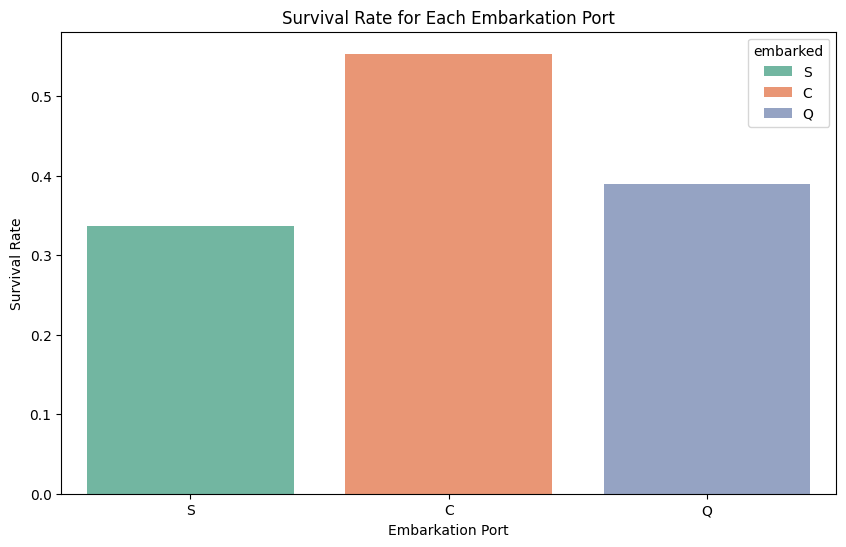

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(x='embarked', y='survived', data=titanic, hue='embarked', errorbar=None, palette='Set2')
plt.title('Survival Rate for Each Embarkation Port')
plt.ylabel('Survival Rate')
plt.xlabel('Embarkation Port')
plt.savefig('figs/fig6.png', dpi=300)
plt.show()

**Bar Chart:** Shows the survival rate for each embarkation port. This provides a clear visual representation of the survival rates across different embarkation ports.

##### **Task 4**

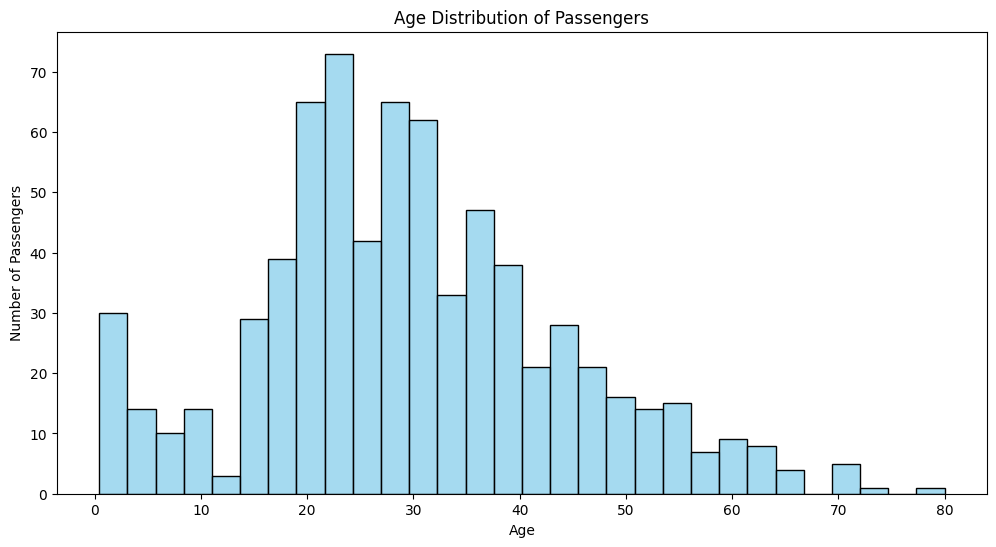

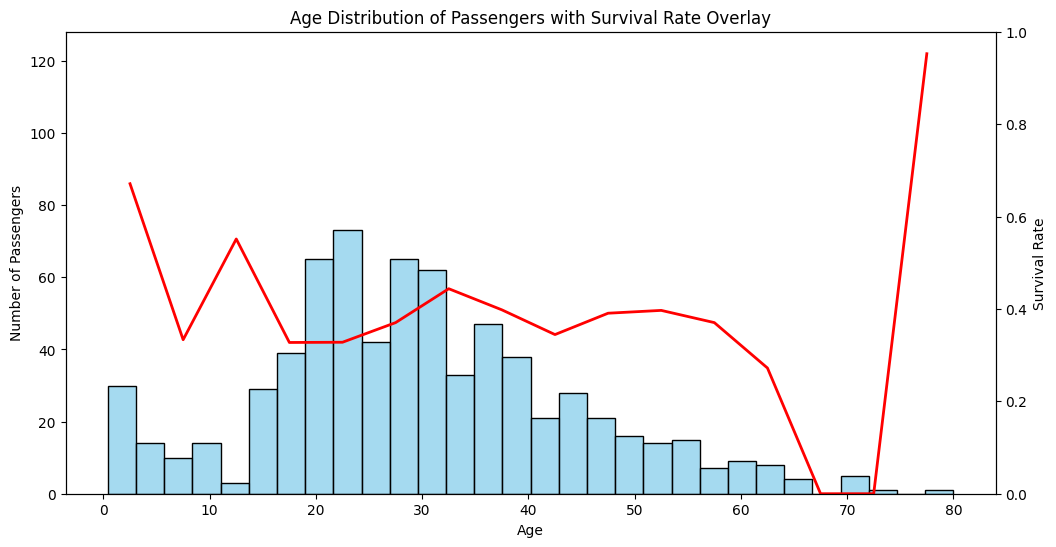

In [10]:
plt.figure(figsize=(12, 6))
sns.histplot(titanic['age'].dropna(), bins=30, kde=False, color='skyblue')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.show()

age_bins = pd.cut(titanic['age'], bins=range(0, 81, 5))
age_survival_rate = titanic.groupby(age_bins, observed=False)['survived'].mean()
age_counts = titanic['age'].value_counts(bins=range(0, 81, 5)).sort_index()

plt.figure(figsize=(12, 6))
sns.histplot(titanic['age'].dropna(), bins=30, kde=False, color='skyblue')
plt.plot(age_survival_rate.index.categories.mid, age_survival_rate.values * age_counts.max(), color='red', linewidth=2)
plt.title('Age Distribution of Passengers with Survival Rate Overlay')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.twinx()
plt.ylabel('Survival Rate')
plt.savefig('figs/fig7.png', dpi=300)
plt.show()

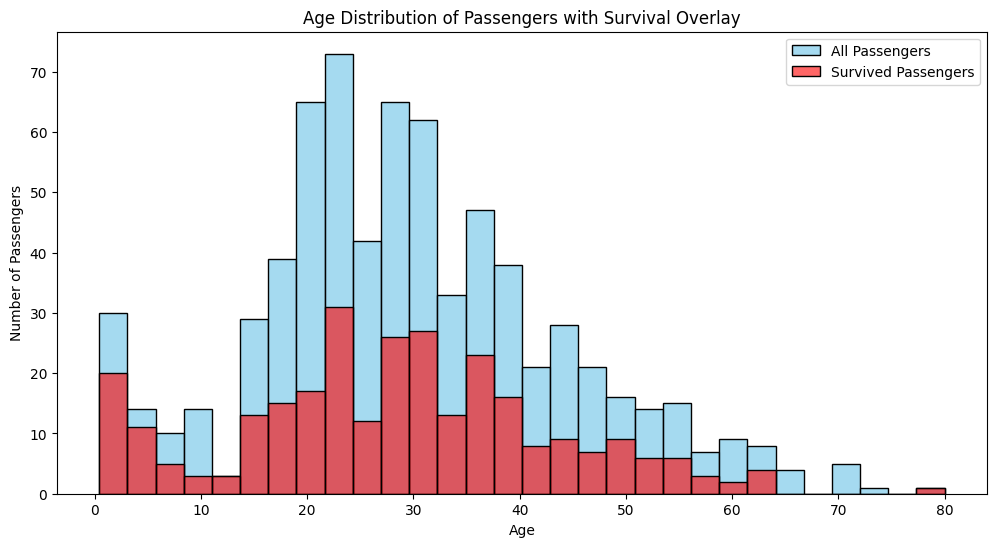

In [11]:
plt.figure(figsize=(12, 6))
sns.histplot(titanic['age'].dropna(), bins=30, kde=False, color='skyblue', label='All Passengers')
sns.histplot(titanic[titanic['survived'] == 1]['age'].dropna(), bins=30, kde=False, color='red', label='Survived Passengers', alpha=0.6)
plt.title('Age Distribution of Passengers with Survival Overlay')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.legend()
plt.savefig('figs/fig8.png', dpi=300)
plt.show()

**Histogram with Overlay:** This plot shows the number of passengers on the y-axis for both all passengers and survived passengers. The histograms overlap in the same plot, providing a clear comparison of the age distribution between all passengers and those who survived.

##### **Task 5**

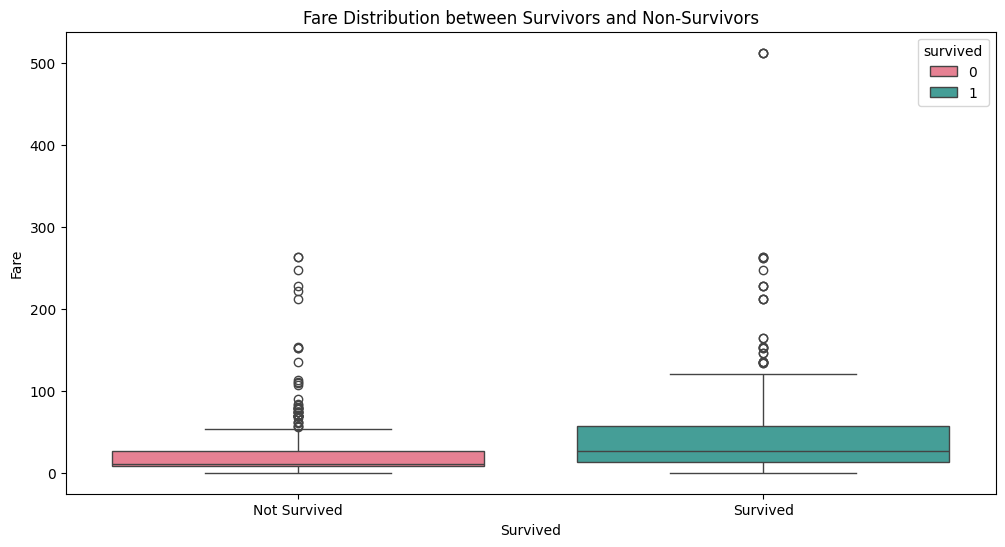

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='survived', y='fare', hue='survived', data=titanic, palette='husl')
plt.title('Fare Distribution between Survivors and Non-Survivors')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.savefig('figs/fig9.png', dpi=300)
plt.show()

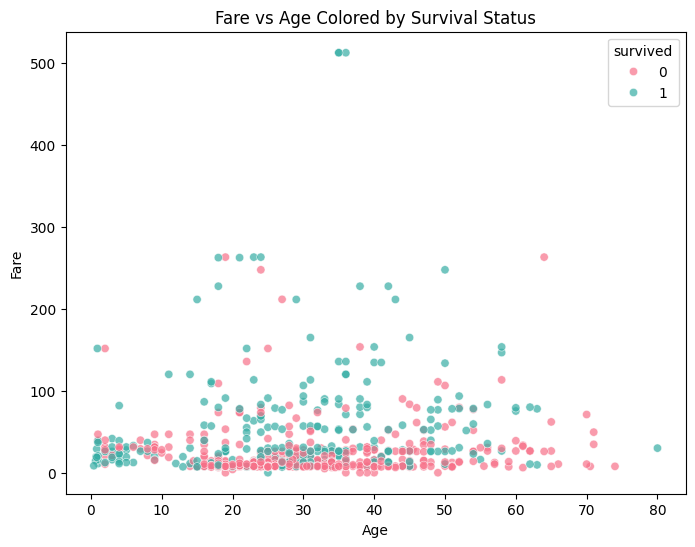

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='fare', hue='survived', data=titanic, palette='husl', alpha=0.7)
plt.title('Fare vs Age Colored by Survival Status')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.savefig('figs/fig10.png', dpi=300)
plt.show()

**Scatter Plot:** This chart shows fare on the y-axis and age on the x-axis, with dots colored by survival status. It provides a clear visual representation of the relationship between fare, age, and survival status.

### **Story 2: A Decade of Growth: Tracking Foreign Tourist Arrivals in India**

##### **Task 1**

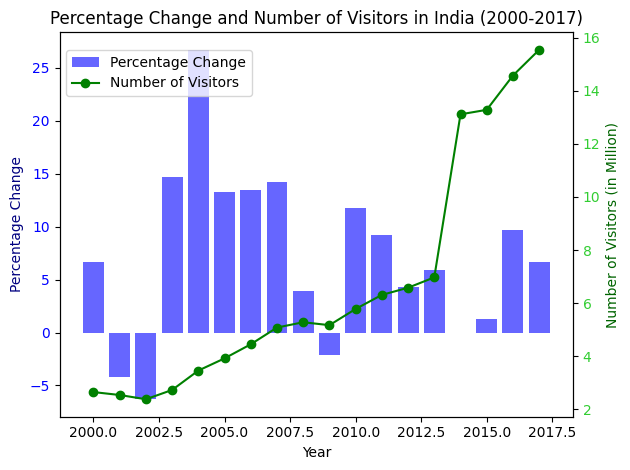

In [14]:
file_path = 'd:/Acads/6th Semester/DV/Lab 1/Tourism_In_India_Statistics_2018-Table_3.1.2.csv'
data = pd.read_csv(file_path)

years = data['Year']
percentage_change = data['India - Percentage change']
visitors = data['India - Arrival (in Million)']

fig, ax1 = plt.subplots()

ax1.bar(years, percentage_change, color='b', alpha=0.6, label='Percentage Change')
ax1.set_xlabel('Year')
ax1.set_ylabel('Percentage Change', color='navy')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(years, visitors, color='g', marker='o', label='Number of Visitors')
ax2.set_ylabel('Number of Visitors (in Million)', color='darkgreen')
ax2.tick_params(axis='y', labelcolor='limegreen')

plt.title('Percentage Change and Number of Visitors in India (2000-2017)')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))

plt.show()

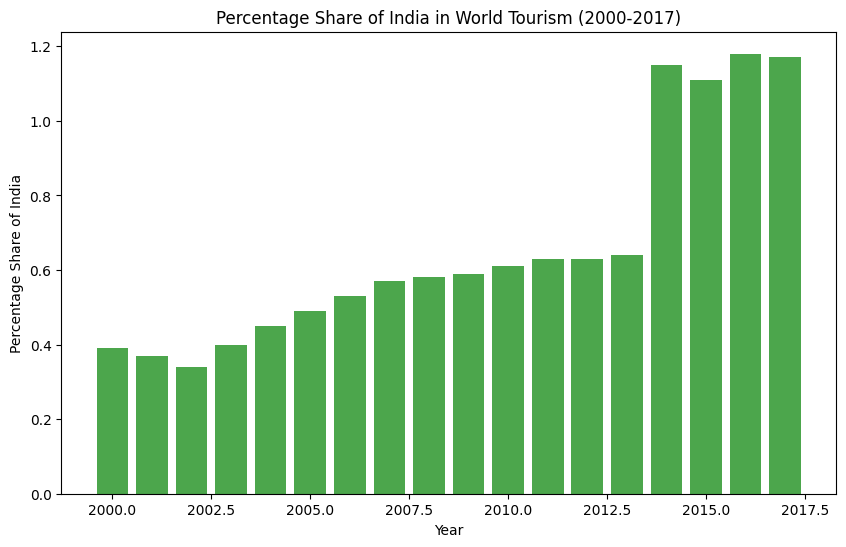

In [15]:
years = data['Year']
percentage_share = data['Percentage share of India']

plt.figure(figsize=(10, 6))
plt.bar(years, percentage_share, color='g', alpha=0.7)

plt.xlabel('Year')
plt.ylabel('Percentage Share of India')
plt.title('Percentage Share of India in World Tourism (2000-2017)')

plt.show()

##### **Task 2**

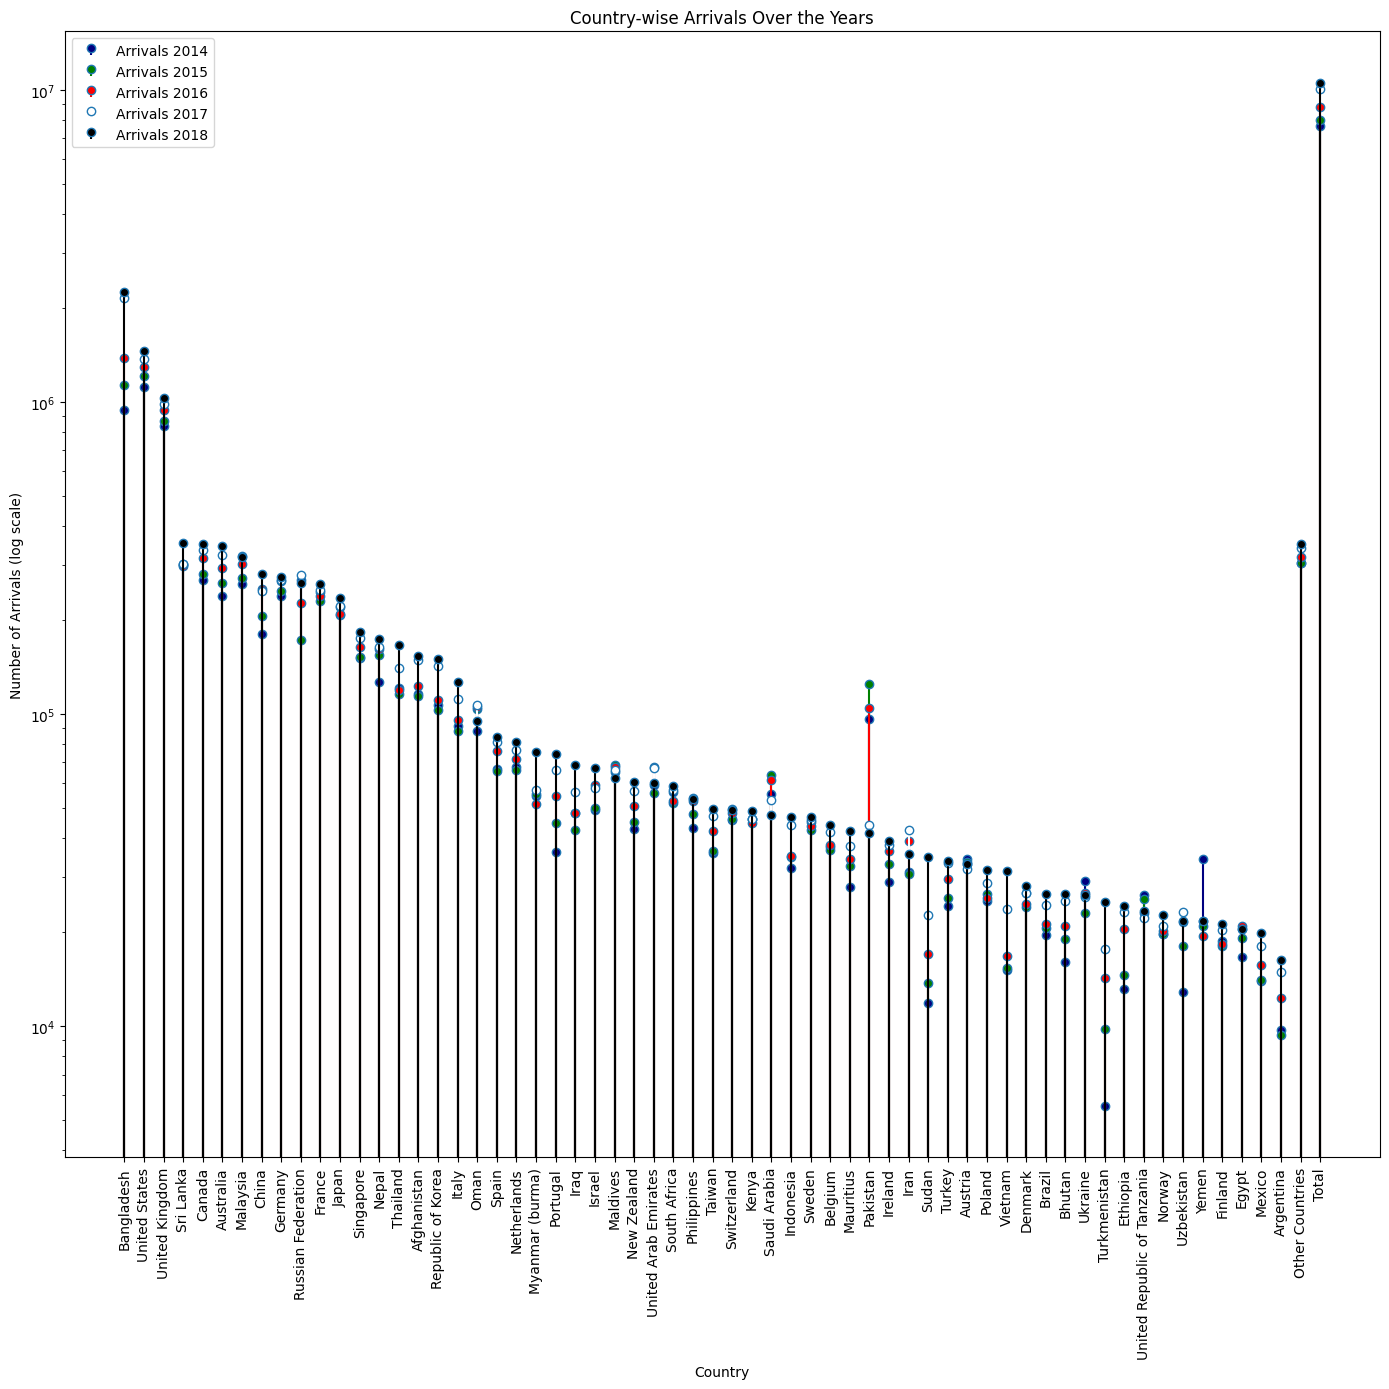

In [16]:
file_path = 'd:/Acads/6th Semester/DV/Lab 1/RS_Session_250_AU1753_Annexure-I.csv'
data = pd.read_csv(file_path)

data = data[:-1]

countries = data['Country']
arrivals_2014 = data['FTA - 2014'].astype(int)
arrivals_2015 = data['FTA - 2015'].astype(int)
arrivals_2016 = data['FTA - 2016'].astype(int)
arrivals_2017 = data['FTA - 2017'].astype(int)
arrivals_2018 = data['FTA - 2018'].astype(int)

plt.figure(figsize=(14, 14))

years = ['2014', '2015', '2016', '2017', '2018']
arrivals = [arrivals_2014, arrivals_2015, arrivals_2016, arrivals_2017, arrivals_2018]
colors = ['navy', 'green', 'red', 'white', 'black']

for year, arrival, color in zip(years, arrivals, colors):
    markerline, stemlines, baseline = plt.stem(countries, arrival, basefmt=" ", label=f'Arrivals {year}')
    plt.setp(markerline, 'markerfacecolor', color)
    plt.setp(stemlines, 'color', color)

plt.yscale('log')

plt.xlabel('Country')
plt.ylabel('Number of Arrivals (log scale)')
plt.title('Country-wise Arrivals Over the Years')
plt.xticks(rotation=90)
plt.legend()

plt.tight_layout()
plt.show()

In [17]:
file_path = 'd:/Acads/6th Semester/DV/Lab 1/Tourism_In_India_Statistics_2018-Table_2.2.1.csv'
data = pd.read_csv(file_path)

data = data[:-1]

regions = data['Region/Country ']
years = ['2015', '2016', '2017']

source = []
target = []
value = []

for i, year in enumerate(years):
    for j, region in enumerate(regions):
        source.append(i)
        target.append(len(years) + j)
        value.append(data[f'Number of Arrivals - {year}'].iloc[j])

labels = years + list(regions)

fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels
    ),
    link=dict(
        source=source,
        target=target,
        value=value
    )
)])

fig.update_layout(title_text="Year-wise Arrivals from Different Regions/Countries (2015-2017)", font_size=10)

fig.show()

##### **Task 3**

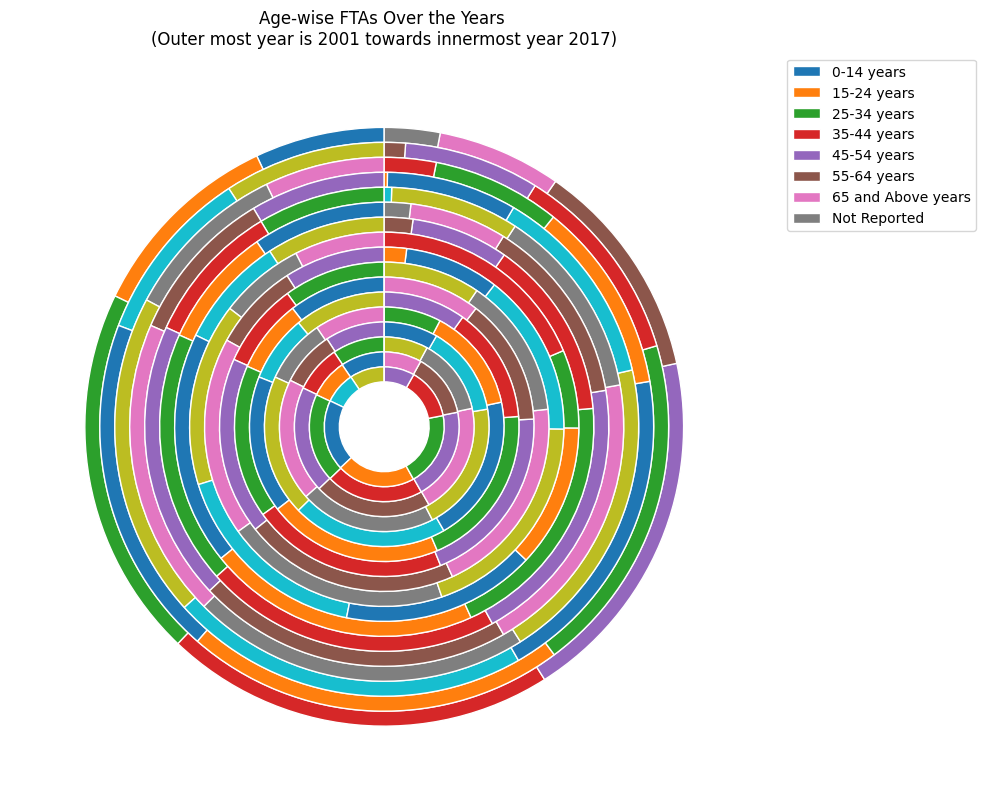

In [18]:
file_path = 'd:/Acads/6th Semester/DV/Lab 1/Tourism_In_India_Statistics_2018-Table_2.7.1.csv'
data = pd.read_csv(file_path)

years = data['Year']
age_groups = [
    'Percentage Distribution by age group (0-14 years)',
    'Percentage Distribution by age group (15-24 years)',
    'Percentage Distribution by age group (25-34 years)',
    'Percentage Distribution by age group (35-44 years)',
    'Percentage Distribution by age group (45-54 years)',
    'Percentage Distribution by age group (55-64 years)',
    'Percentage Distribution by age group (65 and Avobe years)',
    'Percentage Distribution by age group (Not Reported)'
]
age_group_labels = ['0-14 years', '15-24 years', '25-34 years', '35-44 years', '45-54 years', '55-64 years', '65 and Above years', 'Not Reported']

fig, ax = plt.subplots(figsize=(10, 10))

width = 0.05

for i, year in enumerate(years):
    values = data.loc[data['Year'] == year, age_groups].values.flatten()
    ax.pie(values, labels=age_group_labels if i == 0 else None, startangle=90, radius=1 - i * width, wedgeprops=dict(width=width, edgecolor='w'), labeldistance=None, normalize=True)

plt.title('Age-wise FTAs Over the Years \n(Outer most year is 2001 towards innermost year 2017)')

plt.legend(age_group_labels, loc='upper right', bbox_to_anchor=(1.3, 1))

plt.tight_layout()
plt.show()

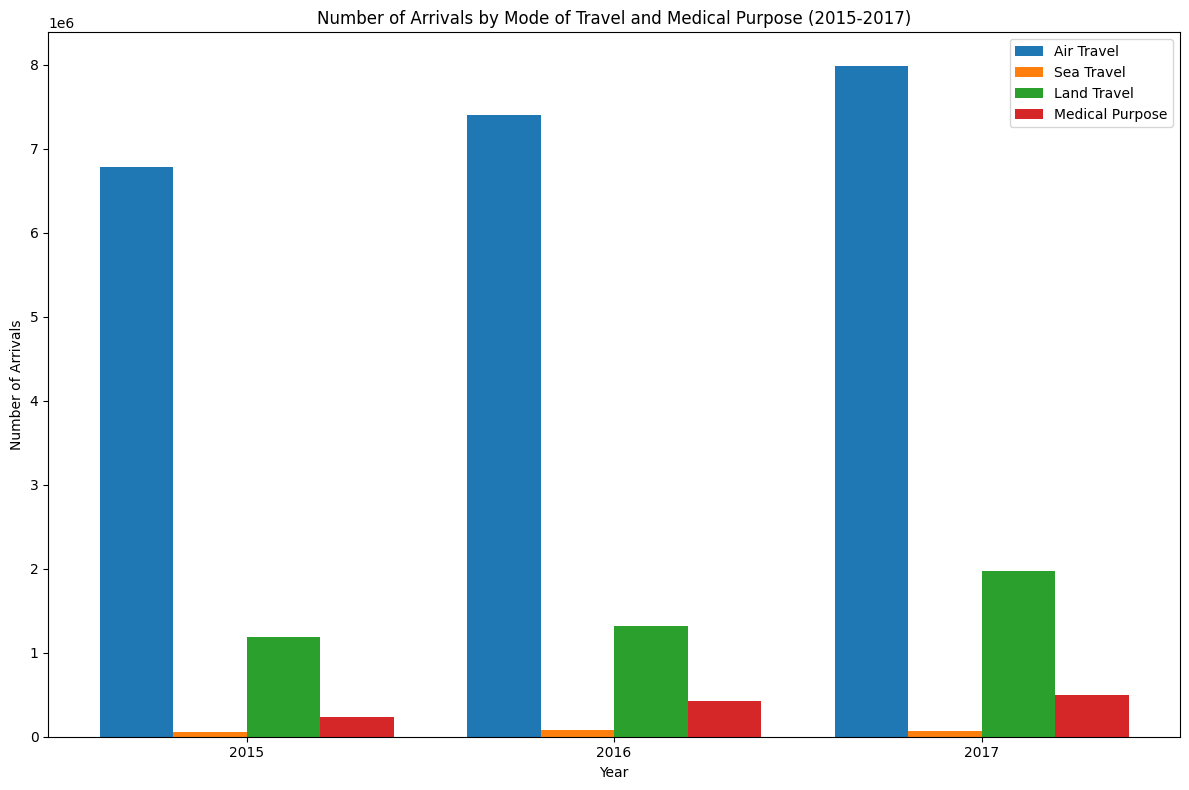

In [19]:
file_path_1 = 'd:/Acads/6th Semester/DV/Lab 1/Tourism_In_India_Statistics_2018-Table_2.4.1.csv'
file_path_2 = 'd:/Acads/6th Semester/DV/Lab 1/RS_249_AU449.csv'

data_1 = pd.read_csv(file_path_1)
data_2 = pd.read_csv(file_path_2)

filtered_data_1 = data_1[data_1['Year'].isin([2015, 2016, 2017])].copy()
filtered_data_2 = data_2[data_2['Year'].isin([2015, 2016, 2017])].copy()

filtered_data_1.loc[:, 'Air Travel'] = (filtered_data_1['Arrivals'] * filtered_data_1['Percentage distribution by mode of Travel - Air'] / 100).astype(int)
filtered_data_1.loc[:, 'Sea Travel'] = (filtered_data_1['Arrivals'] * filtered_data_1['Percentage distribution by mode of Travel - Sea'] / 100).astype(int)
filtered_data_1.loc[:, 'Land Travel'] = (filtered_data_1['Arrivals'] * filtered_data_1['Percentage distribution by mode of Travel - Land'] / 100).astype(int)

years = [2015, 2016, 2017]
air_travel = filtered_data_1['Air Travel'].values
sea_travel = filtered_data_1['Sea Travel'].values
land_travel = filtered_data_1['Land Travel'].values
medical_purpose = filtered_data_2['Number of Foreign Tourist Arrivals for Medical Purpose'].values

bar_width = 0.2
index = range(len(years))

plt.figure(figsize=(12, 8))

plt.bar(index, air_travel, bar_width, label='Air Travel')
plt.bar([i + bar_width for i in index], sea_travel, bar_width, label='Sea Travel')
plt.bar([i + 2 * bar_width for i in index], land_travel, bar_width, label='Land Travel')
plt.bar([i + 3 * bar_width for i in index], medical_purpose, bar_width, label='Medical Purpose')

plt.xlabel('Year')
plt.ylabel('Number of Arrivals')
plt.title('Number of Arrivals by Mode of Travel and Medical Purpose (2015-2017)')
plt.xticks([i + 1.5 * bar_width for i in index], years)
plt.legend()

plt.tight_layout()
plt.show()

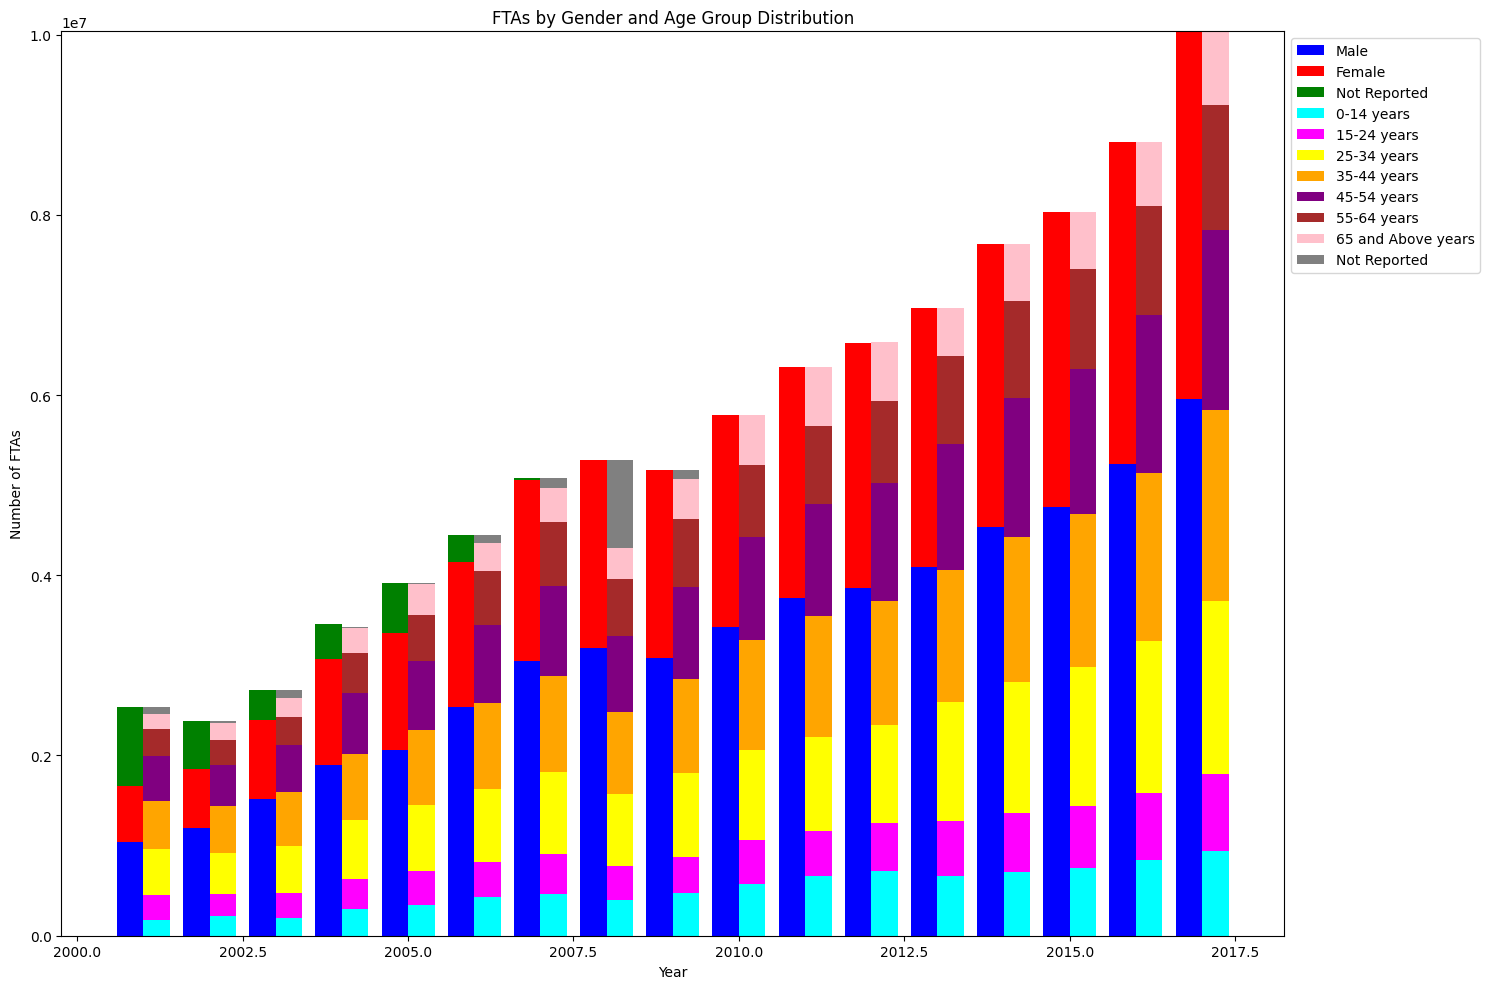

In [20]:
df_gender = pd.read_csv('Tourism_In_India_Statistics_2018-Table_2.6.1.csv')
df_age = pd.read_csv('Tourism_In_India_Statistics_2018-Table_2.7.1.csv')

df_gender['Male'] = df_gender['Arrivals'] * df_gender['Gender Distribution in Percentage - Male'] / 100
df_gender['Female'] = df_gender['Arrivals'] * df_gender['Gender Distribution in Percentage - Female'] / 100
df_gender['Not Reported'] = df_gender['Arrivals'] * df_gender['Gender Distribution in Percentage - Not Reported'] / 100

df_age['0-14 years'] = df_age['FTAs'] * df_age['Percentage Distribution by age group (0-14 years)'] / 100
df_age['15-24 years'] = df_age['FTAs'] * df_age['Percentage Distribution by age group (15-24 years)'] / 100
df_age['25-34 years'] = df_age['FTAs'] * df_age['Percentage Distribution by age group (25-34 years)'] / 100
df_age['35-44 years'] = df_age['FTAs'] * df_age['Percentage Distribution by age group (35-44 years)'] / 100
df_age['45-54 years'] = df_age['FTAs'] * df_age['Percentage Distribution by age group (45-54 years)'] / 100
df_age['55-64 years'] = df_age['FTAs'] * df_age['Percentage Distribution by age group (55-64 years)'] / 100
df_age['65 and Above years'] = df_age['FTAs'] * df_age['Percentage Distribution by age group (65 and Avobe years)'] / 100
df_age['Not Reported'] = df_age['FTAs'] * df_age['Percentage Distribution by age group (Not Reported)'] / 100

fig, ax = plt.subplots(figsize=(15, 10))

ax.bar(df_gender['Year'] - 0.2, df_gender['Male'], width=0.4, label='Male', color='blue', align='center')
ax.bar(df_gender['Year'] - 0.2, df_gender['Female'], width=0.4, bottom=df_gender['Male'], label='Female', color='red', align='center')
ax.bar(df_gender['Year'] - 0.2, df_gender['Not Reported'], width=0.4, bottom=df_gender['Male'] + df_gender['Female'], label='Not Reported', color='green', align='center')

ax.bar(df_age['Year'] + 0.2, df_age['0-14 years'], width=0.4, label='0-14 years', color='cyan', align='center')
ax.bar(df_age['Year'] + 0.2, df_age['15-24 years'], width=0.4, bottom=df_age['0-14 years'], label='15-24 years', color='magenta', align='center')
ax.bar(df_age['Year'] + 0.2, df_age['25-34 years'], width=0.4, bottom=df_age['0-14 years'] + df_age['15-24 years'], label='25-34 years', color='yellow', align='center')
ax.bar(df_age['Year'] + 0.2, df_age['35-44 years'], width=0.4, bottom=df_age['0-14 years'] + df_age['15-24 years'] + df_age['25-34 years'], label='35-44 years', color='orange', align='center')
ax.bar(df_age['Year'] + 0.2, df_age['45-54 years'], width=0.4, bottom=df_age['0-14 years'] + df_age['15-24 years'] + df_age['25-34 years'] + df_age['35-44 years'], label='45-54 years', color='purple', align='center')
ax.bar(df_age['Year'] + 0.2, df_age['55-64 years'], width=0.4, bottom=df_age['0-14 years'] + df_age['15-24 years'] + df_age['25-34 years'] + df_age['35-44 years'] + df_age['45-54 years'], label='55-64 years', color='brown', align='center')
ax.bar(df_age['Year'] + 0.2, df_age['65 and Above years'], width=0.4, bottom=df_age['0-14 years'] + df_age['15-24 years'] + df_age['25-34 years'] + df_age['35-44 years'] + df_age['45-54 years'] + df_age['55-64 years'], label='65 and Above years', color='pink', align='center')
ax.bar(df_age['Year'] + 0.2, df_age['Not Reported'], width=0.4, bottom=df_age['0-14 years'] + df_age['15-24 years'] + df_age['25-34 years'] + df_age['35-44 years'] + df_age['45-54 years'] + df_age['55-64 years'] + df_age['65 and Above years'], label='Not Reported', color='grey', align='center')

ax.set_xlabel('Year')
ax.set_ylabel('Number of FTAs')
ax.set_title('FTAs by Gender and Age Group Distribution')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

In [21]:
file_path = 'd:/Acads/6th Semester/DV/Lab 1/Tourism_In_India_Statistics_2018-Table_2.7.2.csv'
data = pd.read_csv(file_path)

data = data[~data['Country of Nationality'].str.contains('Total')]

age_groups = ['0 - 14 years', '15 - 24 years', '25 - 34 years', '35 - 44 years', '45 - 54 years', '55 - 64 years', '65 and Above years']
age_group_labels = ['0-14 years', '15-24 years', '25-34 years', '35-44 years', '45-54 years', '55-64 years', '65 and Above years']

melted_data = data.melt(id_vars=['Nationality', 'Country of Nationality', 'Arrivals'], value_vars=age_groups, var_name='Age Group', value_name='Percentage')

melted_data['Number of Arrivals'] = (melted_data['Arrivals'] * melted_data['Percentage'] / 100).astype(int)

fig = px.treemap(melted_data, path=['Nationality', 'Country of Nationality', 'Age Group'], values='Number of Arrivals',
                 color='Number of Arrivals', hover_data=['Percentage'],
                 color_continuous_scale='Viridis', title='Nationality-wise Age Distribution of Arrivals')

fig.show()

### **Story 03: Analysis of COVID-19 India**

##### **Task 1**

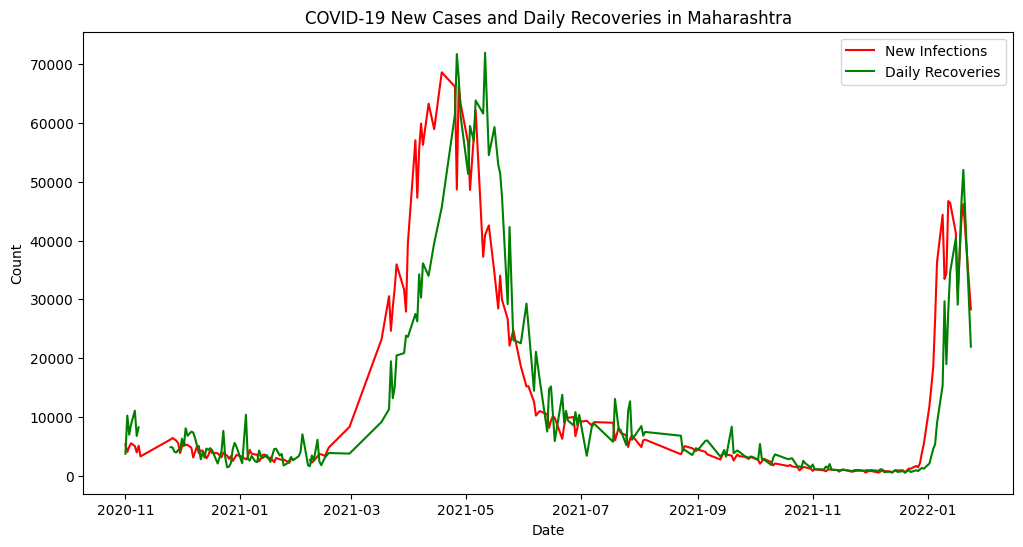

In [22]:
file_path = 'MH_case_info.csv'
data = pd.read_csv(file_path)

data['date'] = pd.to_datetime(data['date'])

plt.figure(figsize=(12, 6))
plt.plot(data['date'], data['cases_new'], color='red', label='New Infections')
plt.plot(data['date'], data['discharged_today'], color='green', label='Daily Recoveries')

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('COVID-19 New Cases and Daily Recoveries in Maharashtra')
plt.legend()

plt.show()

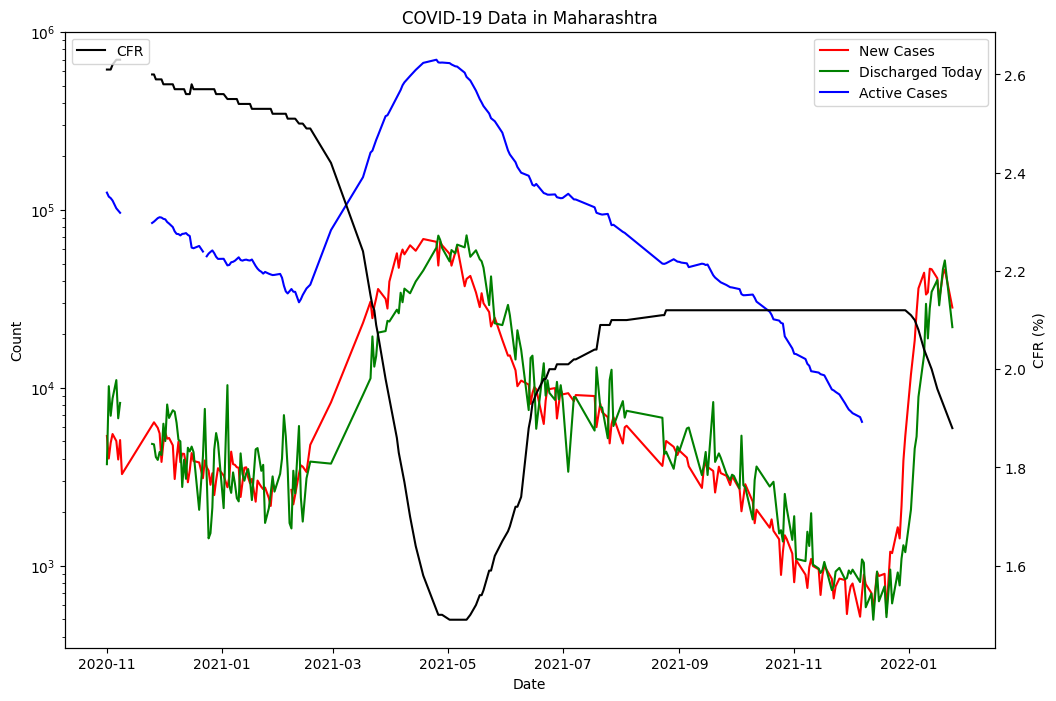

In [23]:
file_path = 'MH_case_info.csv'
data = pd.read_csv(file_path)

data['date'] = pd.to_datetime(data['date'])

fig, ax1 = plt.subplots(figsize=(12, 8))

ax1.plot(data['date'], data['cases_new'], color='red', label='New Cases')
ax1.plot(data['date'], data['discharged_today'], color='green', label='Discharged Today')
ax1.plot(data['date'], data['active_cases'], color='blue', label='Active Cases')

ax1.set_yscale('log')
ax1.set_xlabel('Date')
ax1.set_ylabel('Count')
ax1.legend(loc='upper right')

ax2 = ax1.twinx()
ax2.plot(data['date'], data['cfr'], color='black', label='CFR')

ax2.set_ylabel('CFR (%)')
ax2.legend(loc='upper left')

plt.title('COVID-19 Data in Maharashtra')

plt.show()

##### **Task 2**

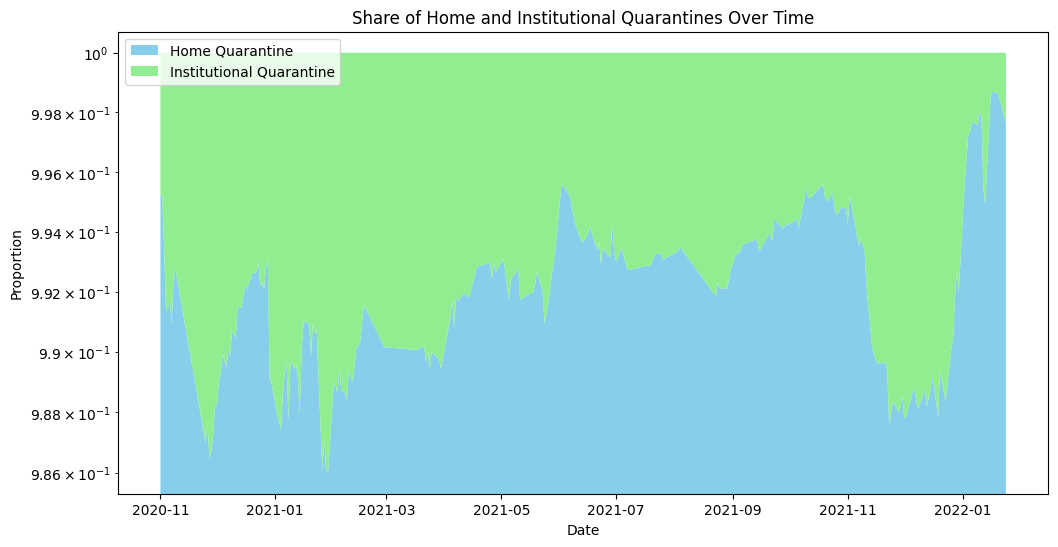

In [24]:
file_path = 'MH_case_info.csv'
data = pd.read_csv(file_path)

data['date'] = pd.to_datetime(data['date'])

data['total_quarantine'] = data['current_home_quarantine'] + data['current_institutional_quarantine']

data['home_quarantine_proportion'] = data['current_home_quarantine'] / data['total_quarantine']
data['institutional_quarantine_proportion'] = data['current_institutional_quarantine'] / data['total_quarantine']

plt.figure(figsize=(12, 6))
plt.stackplot(data['date'], data['home_quarantine_proportion'], data['institutional_quarantine_proportion'], labels=['Home Quarantine', 'Institutional Quarantine'], colors=['skyblue', 'lightgreen'])

plt.yscale('log')   
plt.xlabel('Date')
plt.ylabel('Proportion')
plt.title('Share of Home and Institutional Quarantines Over Time')
plt.legend(loc='upper left')

plt.show()

##### **Task 3**

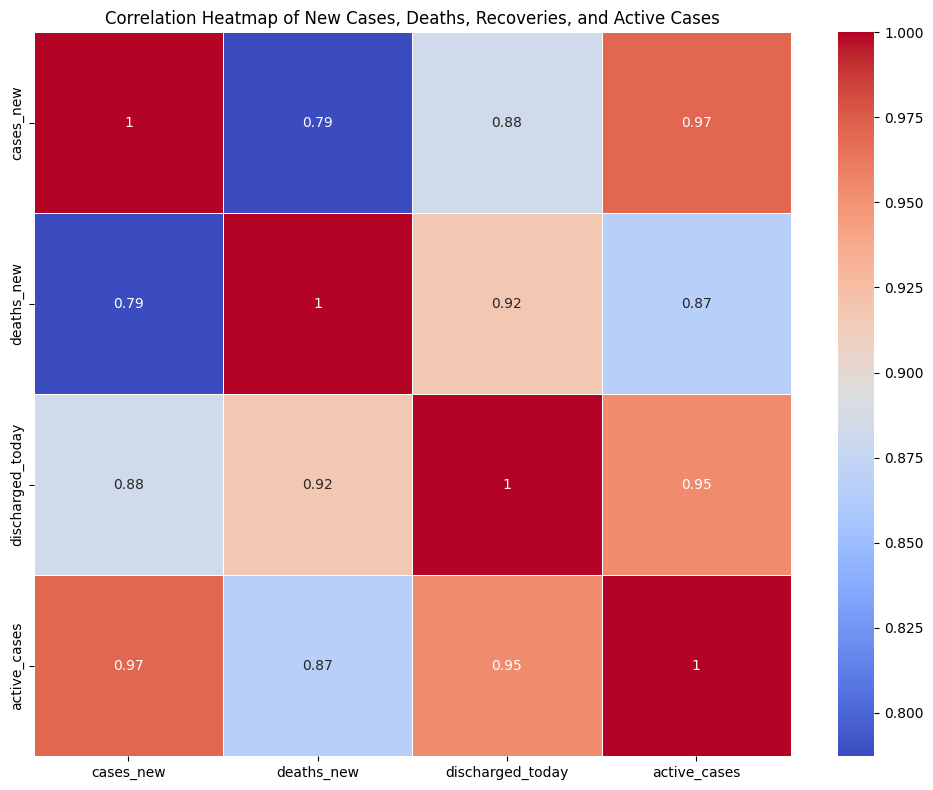

In [25]:
file_path = 'MH_case_info.csv'
data = pd.read_csv(file_path)

columns_of_interest = ['cases_new', 'deaths_new', 'discharged_today', 'active_cases']
data_subset = data[columns_of_interest]

data_subset = data_subset.dropna()

correlation_matrix = data_subset.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of New Cases, Deaths, Recoveries, and Active Cases')
plt.tight_layout()

plt.show()

##### **Task 4**

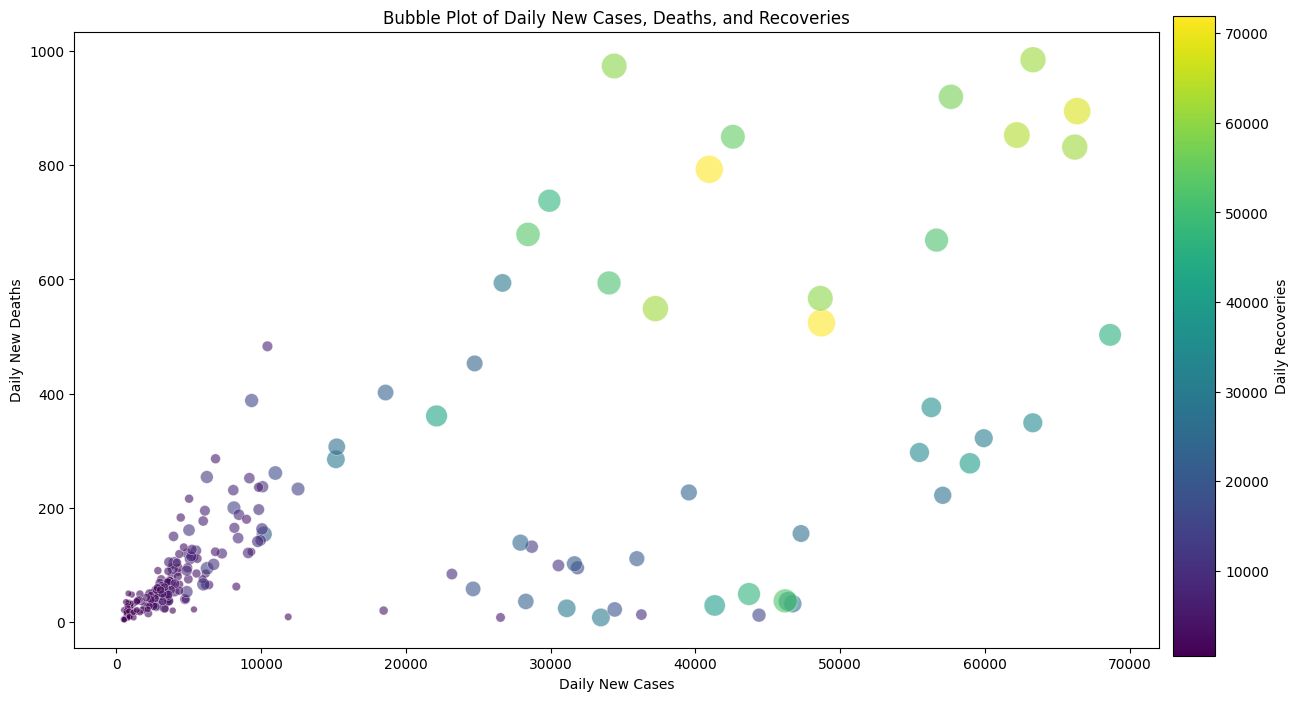

In [26]:
file_path = 'MH_case_info.csv'
data = pd.read_csv(file_path)

data = data.dropna(subset=['cases_new', 'deaths_new', 'discharged_today'])

plt.figure(figsize=(14, 8))
bubble_plot = sns.scatterplot(
    x='cases_new', 
    y='deaths_new', 
    size='discharged_today', 
    hue='discharged_today', 
    data=data, 
    palette='viridis', 
    sizes=(20, 400), 
    alpha=0.6, 
    edgecolor='w', 
    legend=None
)

plt.title('Bubble Plot of Daily New Cases, Deaths, and Recoveries')
plt.xlabel('Daily New Cases')
plt.ylabel('Daily New Deaths')

norm = plt.Normalize(data['discharged_today'].min(), data['discharged_today'].max())
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
plt.colorbar(sm, label='Daily Recoveries', cax=plt.axes([0.91, 0.1, 0.03, 0.8]))

plt.show()

##### **Task 5**

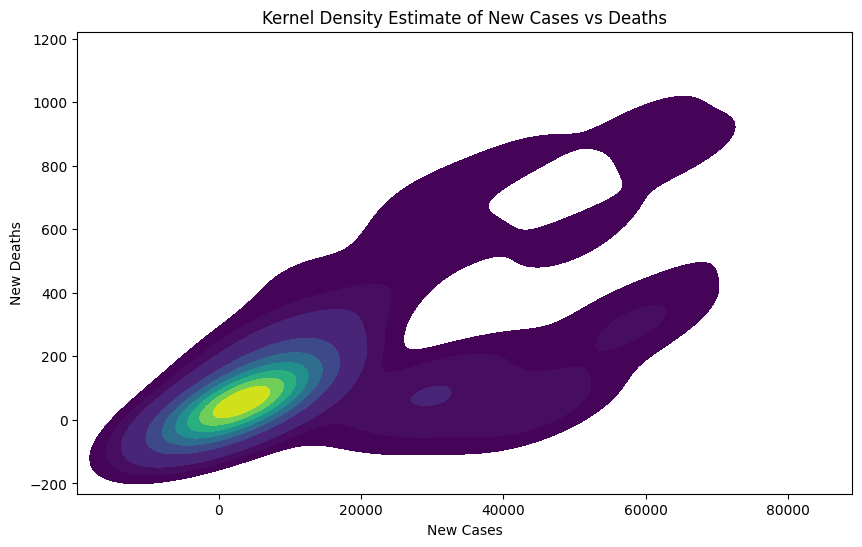

In [27]:
file_path = 'MH_case_info.csv'
data = pd.read_csv(file_path)

data = data.dropna(subset=['cases_new', 'deaths_new'])

plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='cases_new', y='deaths_new', fill=True, cmap="viridis")
plt.title('Kernel Density Estimate of New Cases vs Deaths')
plt.xlabel('New Cases')
plt.ylabel('New Deaths')
plt.show()

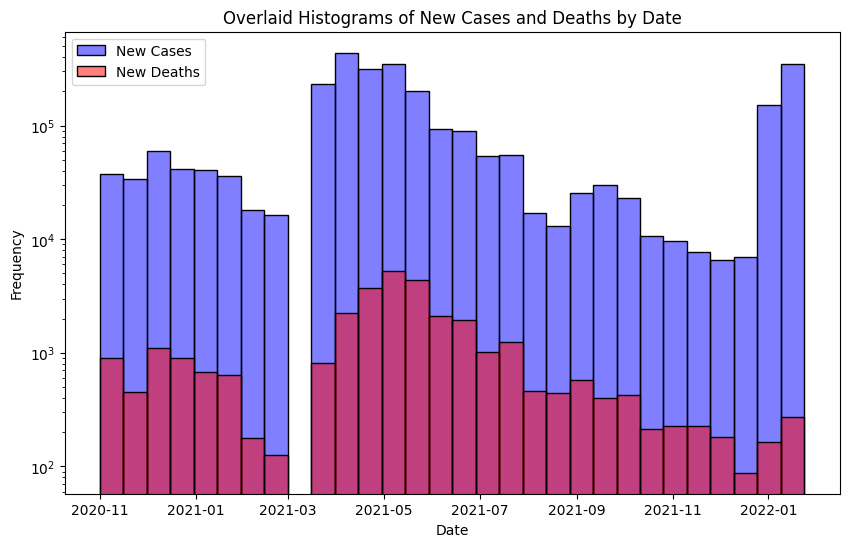

In [28]:
file_path = 'MH_case_info.csv'
data = pd.read_csv(file_path)

data['date'] = pd.to_datetime(data['date'])

data = data.dropna(subset=['cases_new', 'deaths_new'])

aggregated_data = data.groupby('date').sum().reset_index()

plt.figure(figsize=(10, 6))
sns.histplot(aggregated_data, x='date', weights='cases_new', bins=30, color='blue', label='New Cases', kde=False, alpha=0.5)
sns.histplot(aggregated_data, x='date', weights='deaths_new', bins=30, color='red', label='New Deaths', kde=False, alpha=0.5)
plt.yscale('log')
plt.title('Overlaid Histograms of New Cases and Deaths by Date')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### **Story 04: IPL Tracker**

##### **Task 1**

In [29]:
df = pd.read_csv('IPL_Matches_2008_2022.csv')

df['WinningTeam'] = df['WinningTeam'].replace({
    'Rising Pune Supergiant': 'Rising Pune Supergiants',
    'Rising Pune Supergiants': 'Rising Pune Supergiants'
})

wins_per_season = df.groupby(['WinningTeam', 'Season']).size().reset_index(name='Wins')

fig = px.treemap(wins_per_season, path=['WinningTeam', 'Season'], values='Wins',
                 color='Wins', hover_data=['Wins'],
                 color_continuous_scale='tempo',
                 title='Number of Wins of Each Team per Season')

fig.show()

##### **Task 2**

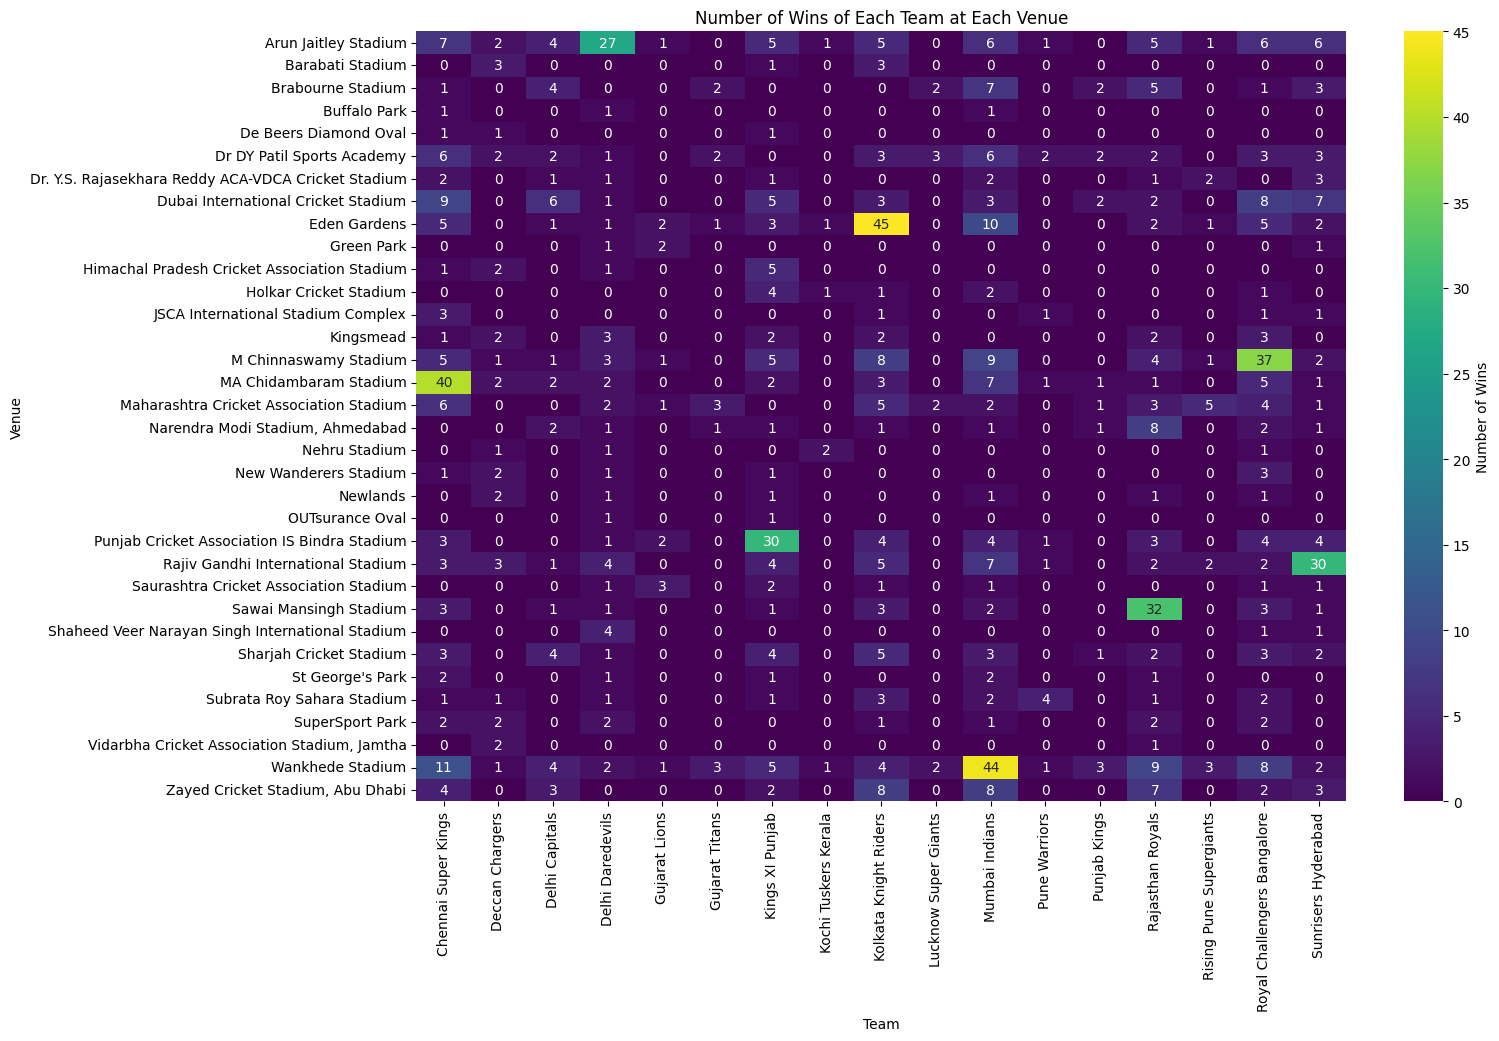

In [30]:
df = pd.read_csv('IPL_Matches_2008_2022.csv')

df['WinningTeam'] = df['WinningTeam'].replace({
    'Rising Pune Supergiant': 'Rising Pune Supergiants',
    'Rising Pune Supergiants': 'Rising Pune Supergiants'
})

df['Venue'] = df['Venue'].replace({
    'Eden Gardens, Kolkata': 'Eden Gardens',
    'Wankhede Stadium, Mumbai': 'Wankhede Stadium',
    'Arun Jaitley Stadium, Delhi': 'Arun Jaitley Stadium',
    'Feroz Shah Kotla': 'Arun Jaitley Stadium',
    'Brabourne Stadium, Mumbai': 'Brabourne Stadium',
    'Dr DY Patil Sports Academy, Mumbai': 'Dr DY Patil Sports Academy',
    'M.Chinnaswamy Stadium': 'M Chinnaswamy Stadium',
    'MA Chidambaram Stadium, Chepauk': 'MA Chidambaram Stadium',
    'MA Chidambaram Stadium, Chepauk, Chennai': 'MA Chidambaram Stadium',
    'Maharashtra Cricket Association Stadium, Pune': 'Maharashtra Cricket Association Stadium',
    'Punjab Cricket Association IS Bindra Stadium, Mohali': 'Punjab Cricket Association IS Bindra Stadium',
    'Punjab Cricket Association Stadium, Mohali': 'Punjab Cricket Association IS Bindra Stadium',
    'Rajiv Gandhi International Stadium, Uppal': 'Rajiv Gandhi International Stadium',
    'Sheikh Zayed Stadium': 'Zayed Cricket Stadium, Abu Dhabi',
    'Sardar Patel Stadium, Motera': 'Narendra Modi Stadium, Ahmedabad'
})

wins_per_venue = df.groupby(['Venue', 'WinningTeam']).size().reset_index(name='Wins')

wins_matrix = wins_per_venue.pivot(index='Venue', columns='WinningTeam', values='Wins').fillna(0)

plt.figure(figsize=(15, 10))
sns.heatmap(wins_matrix, annot=True, fmt='g', cmap='viridis', cbar_kws={'label': 'Number of Wins'})
plt.title('Number of Wins of Each Team at Each Venue')
plt.xlabel('Team')
plt.ylabel('Venue')
plt.show()

Home Ground advantage is clearly visible through the heatmap, almost all the teams have most number of wins in their home stadiums.

In [31]:
wins_per_venue = df.groupby(['Venue', 'WinningTeam']).size().reset_index(name='Wins')

fig = px.treemap(wins_per_venue, path=['Venue', 'WinningTeam'], values='Wins',
                 color='Wins', hover_data=['Wins'],
                 color_continuous_scale='viridis',
                 title='Number of Wins of Each Team at Each Venue')

fig.show()

##### **Task 3**

In [32]:
df = pd.read_csv('IPL_Matches_2008_2022.csv')

df['WinningTeam'] = df['WinningTeam'].replace({
    'Rising Pune Supergiant': 'Rising Pune Supergiants',
    'Rising Pune Supergiants': 'Rising Pune Supergiants',
    'Delhi Daredevils': 'Delhi Capitals',
    'Delhi Capitals': 'Delhi Capitals',
    'Kings XI Punjab': 'Punjab Kings',
    'Punjab Kings': 'Punjab Kings',
})

toss_wins = df[df['TossWinner'] == df['WinningTeam']]

toss_decision_wins = toss_wins.groupby(['TossWinner', 'TossDecision']).size().reset_index(name='Wins')

pivot_data = toss_decision_wins.pivot(index='TossWinner', columns='TossDecision', values='Wins').fillna(0)

fig = go.Figure()

for decision in pivot_data.columns:
    fig.add_trace(go.Bar(
        x=pivot_data.index,
        y=pivot_data[decision],
        name=decision
    ))

fig.update_layout(
    barmode='stack',
    title='Impact of Toss Decisions on Match Outcomes',
    xaxis_title='Team',
    yaxis_title='Number of Wins',
    legend_title='Toss Decision'
)

fig.show()

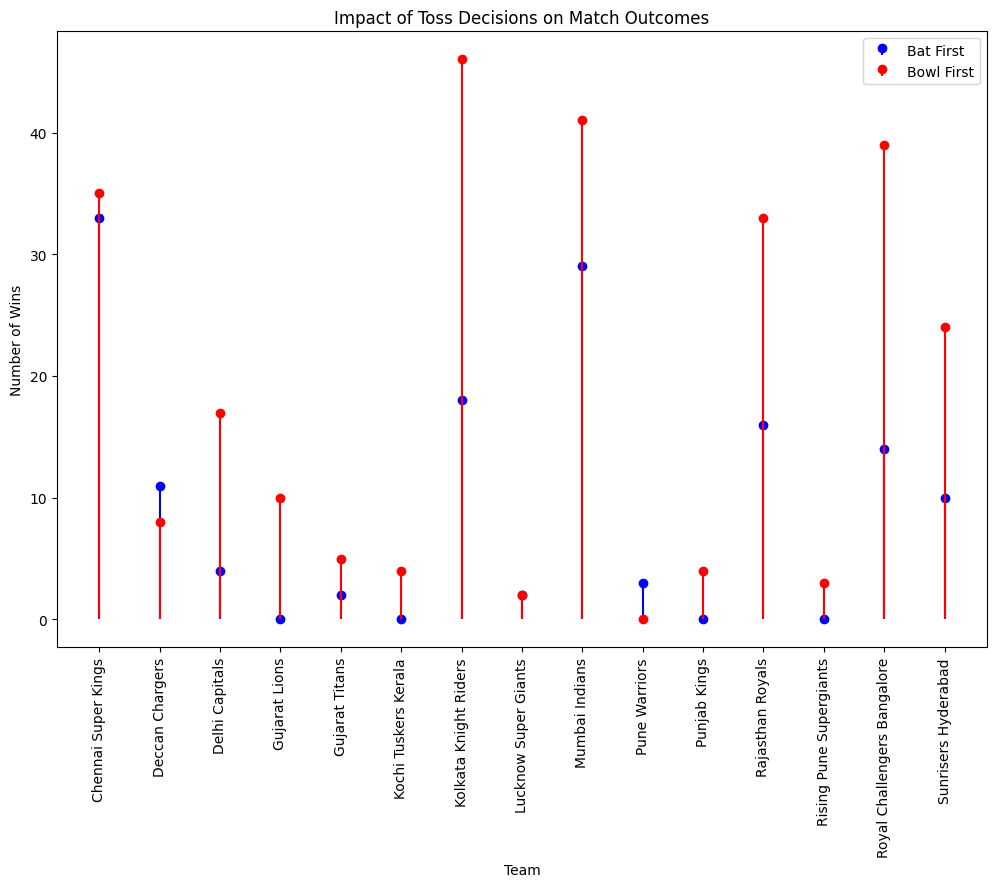

In [33]:
teams = pivot_data.index
bat_first_wins = pivot_data['bat']
bowl_first_wins = pivot_data['field']

fig, ax = plt.subplots(figsize=(12, 8))

ax.stem(teams, bat_first_wins, linefmt='b-', markerfmt='bo', basefmt=" ", label='Bat First')
ax.stem(teams, bowl_first_wins, linefmt='r-', markerfmt='ro', basefmt=" ", label='Bowl First')

ax.set_title('Impact of Toss Decisions on Match Outcomes')
ax.set_xlabel('Team')
ax.set_ylabel('Number of Wins')
ax.legend()

plt.xticks(rotation=90)
plt.show()

##### **Task4**

In [34]:
df = pd.read_csv('IPL_Matches_2008_2022.csv')

player_awards = df.groupby(['Player_of_Match', 'Season']).size().reset_index(name='Awards')

top_players = player_awards.groupby('Player_of_Match')['Awards'].sum().reset_index()
top_players = top_players[top_players['Awards'] > 12]

top_players_data = player_awards[player_awards['Player_of_Match'].isin(top_players['Player_of_Match'])]

pivot_data = top_players_data.pivot(index='Player_of_Match', columns='Season', values='Awards').fillna(0)

categories = pivot_data.columns.tolist()
fig = go.Figure()

for player in pivot_data.index:
    fig.add_trace(go.Scatterpolar(
        r=pivot_data.loc[player].tolist(),
        theta=categories,
        fill='toself',
        name=player
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, pivot_data.values.max()]
        )),
    title='Top-Performing Players Across Seasons',
    showlegend=True
)

fig.show()

In [35]:
pivot_data = top_players_data.pivot(index='Season', columns='Player_of_Match', values='Awards').fillna(0)

fig = go.Figure()

for player in pivot_data.columns:
    fig.add_trace(go.Scatter(
        x=pivot_data.index,
        y=pivot_data[player],
        mode='lines+markers',
        name=player
    ))

fig.update_layout(
    title='Top-Performing Players Across Seasons',
    xaxis_title='Season',
    yaxis_title='Number of Awards',
    legend_title='Player'
)

fig.show()

##### **Task 5**

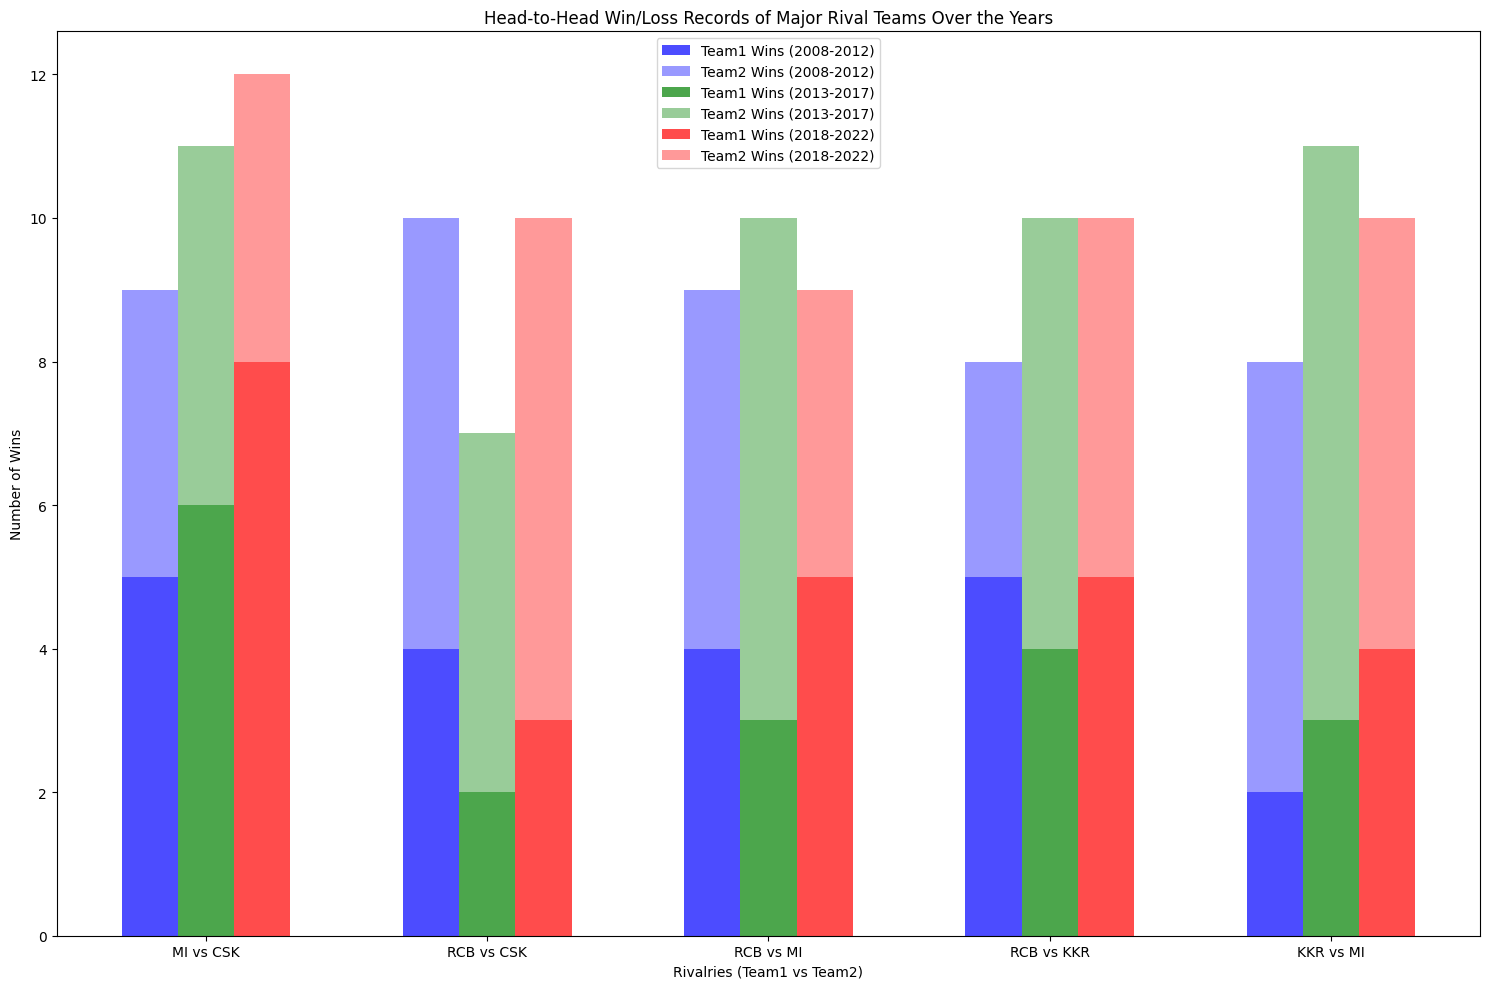

In [36]:
df = pd.read_csv('IPL_Matches_2008_2022.csv')

rivalries = [
    ('Mumbai Indians', 'Chennai Super Kings'),
    ('Royal Challengers Bangalore', 'Chennai Super Kings'),
    ('Royal Challengers Bangalore', 'Mumbai Indians'),
    ('Royal Challengers Bangalore', 'Kolkata Knight Riders'),
    ('Kolkata Knight Riders', 'Mumbai Indians')
]

team_abbr = {
    'Mumbai Indians': 'MI',
    'Chennai Super Kings': 'CSK',
    'Royal Challengers Bangalore': 'RCB',
    'Kolkata Knight Riders': 'KKR'
}

season_parts = {
    '2008-2012': (2008, 2012),
    '2013-2017': (2013, 2017),
    '2018-2022': (2018, 2022)
}

records = {rivalry: {part: {'Team1 Wins': 0, 'Team2 Wins': 0} for part in season_parts} for rivalry in rivalries}

for index, row in df.iterrows():
    team1 = row['Team1']
    team2 = row['Team2']
    winner = row['WinningTeam']
    season = row['Season']
    season = season.split('/')[0]
    
    for rivalry in rivalries:
        if (team1 == rivalry[0] and team2 == rivalry[1]) or (team1 == rivalry[1] and team2 == rivalry[0]):
            for part, (start, end) in season_parts.items():
                if start <= int(season) <= end:
                    if winner == rivalry[0]:
                        records[rivalry][part]['Team1 Wins'] += 1
                    elif winner == rivalry[1]:
                        records[rivalry][part]['Team2 Wins'] += 1

labels = [f'{team_abbr[rivalry[0]]} vs {team_abbr[rivalry[1]]}' for rivalry in rivalries]
x = range(len(rivalries))

fig, ax = plt.subplots(figsize=(15, 10))
bar_width = 0.2
colors = ['b', 'g', 'r']
offset = 0

for i, part in enumerate(season_parts):
    team1_wins = [records[rivalry][part]['Team1 Wins'] for rivalry in rivalries]
    team2_wins = [records[rivalry][part]['Team2 Wins'] for rivalry in rivalries]
    
    bar1 = ax.bar([p + offset for p in x], team1_wins, bar_width, label=f'Team1 Wins ({part})', color=colors[i], alpha=0.7)
    bar2 = ax.bar([p + offset for p in x], team2_wins, bar_width, bottom=team1_wins, label=f'Team2 Wins ({part})', color=colors[i], alpha=0.4)
    
    offset += bar_width

ax.set_xlabel('Rivalries (Team1 vs Team2)') 
ax.set_ylabel('Number of Wins')
ax.set_title('Head-to-Head Win/Loss Records of Major Rival Teams Over the Years')
ax.set_xticks([p + bar_width for p in x])
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()